# Tutorial Step 2: What's in a GWOSC Data File?

In this tutorial, we will use Python to read a GWOSC data file. If you don't have an HDF5 GWOSC data file stored on your computer somewhere, go back to [Step 1](<./01 - Download GWOSC Data.ipynb>).

## Data File Overview

Let's try to read in and plot some data.

In [1]:
#----------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pylab as plt
import h5py

In [2]:
#-------------------------
# Open the File
#-------------------------
fileName = 'H-H1_GWOSC_O3b_4KHZ_R1-1256775680-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
#----------------------
# Explore the file
#----------------------
for key in dataFile.keys():
    print(key)

meta
quality
strain


## Plot a time series

Let's continue our exploration to make a plot of a few seconds of data. To store the strain data in a convenient place, use the code below:

In [4]:
#---------------------
# Read in strain data
#---------------------
strain = dataFile['strain']['Strain']
ts = dataFile['strain']['Strain'].attrs['Xspacing']

The code above accesses the `'Strain'` data object that lives inside the group `'strain'` - we store this as `strain`.
The "attribute" `'Xspacing'` tells how much time there is between each sample, and we store this as `ts`.
To see all the structure of a GWOSC data file, take a look at the View a File tutorial.

Now, let's use the meta-data to make a vector that will label the time stamp of each sample. In the same way that we indexed `dataFile` as a Python dictionary, we can also index `dataFile['meta']`. To see what meta-data we have to work with, use the code below:

In [5]:
#-----------------------
# Print out some meta data
#-----------------------
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print(key, meta[key])

Description <HDF5 dataset "Description": shape (), type "|O">
DescriptionURL <HDF5 dataset "DescriptionURL": shape (), type "|O">
Detector <HDF5 dataset "Detector": shape (), type "|O">
Duration <HDF5 dataset "Duration": shape (), type "<i8">
FrameType <HDF5 dataset "FrameType": shape (), type "|O">
GPSstart <HDF5 dataset "GPSstart": shape (), type "<i8">
Observatory <HDF5 dataset "Observatory": shape (), type "|O">
StrainChannel <HDF5 dataset "StrainChannel": shape (), type "|O">
Type <HDF5 dataset "Type": shape (), type "|O">
UTCstart <HDF5 dataset "UTCstart": shape (), type "|O">


You should see that the GPS start time and the duration are both stored as meta-data.
To calculate how much time passes between samples, we can divide the total duration by the number of samples:

In [6]:
#---------------------------
# Create a time vector
#---------------------------
gpsStart = meta['GPSstart'][()]
duration = meta['Duration'][()]
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

The numpy command `arange` creates an array (think a column of numbers) that starts at `gpsStart`, ends at `gpsEnd` (non-inclusive), and has an increment of `ts` between each element.

We can now plot the data:

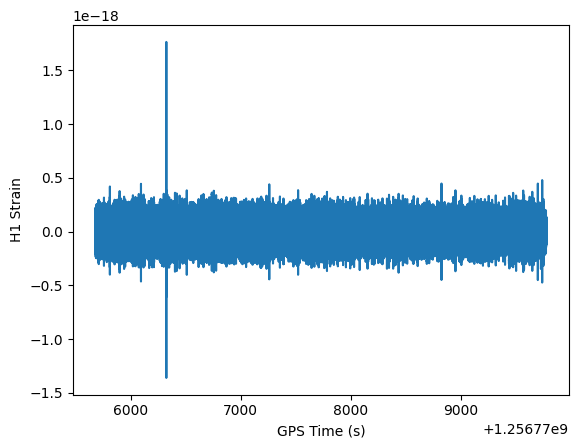

In [7]:
#----------------------
# Plot the time series
#----------------------
plt.plot(time, strain[()])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

Finally, let's use all of this to plot a few seconds worth of data.
Since this data is sampled at 4096 Hz, 10,000 samples corresponds to about 2.4 s.
We will start at time 1256779566.0.

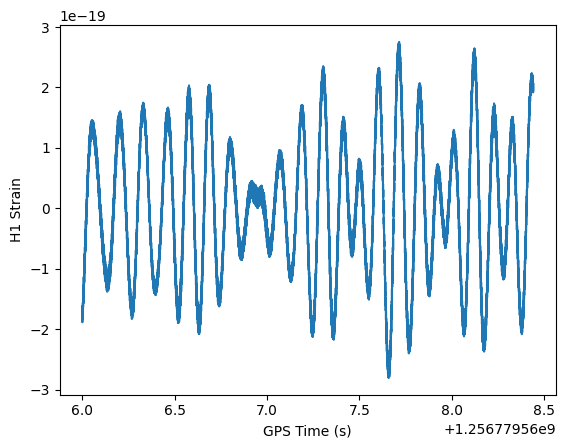

In [8]:
#------------------------
# Zoom in the time series
#------------------------
numsamples=10000
startTime=1256779566.0
startIndex=np.min(np.nonzero(startTime < time))
plt.plot(time[startIndex:(startIndex+numsamples)], strain[startIndex:(startIndex+numsamples)])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

You may be surprised that the data looks smooth and curvy, rather than jagged and jumpy as you might expect for [white noise](https://en.wikipedia.org/wiki/White_noise).
That's because white noise has roughly equal power at all frequencies, which GW data does not.
Rather, GW data includes noise that is a strong function of frequency - we often say the noise is "colored" to distinguish it from white noise.
The wiggles you see in the plot above are at the low end of the LVK band (around 20 Hz).
In general, GW noise is dominated by these low frequencies.
To learn more about GW noise as a function of frequency, take a look at the plot gallery. 